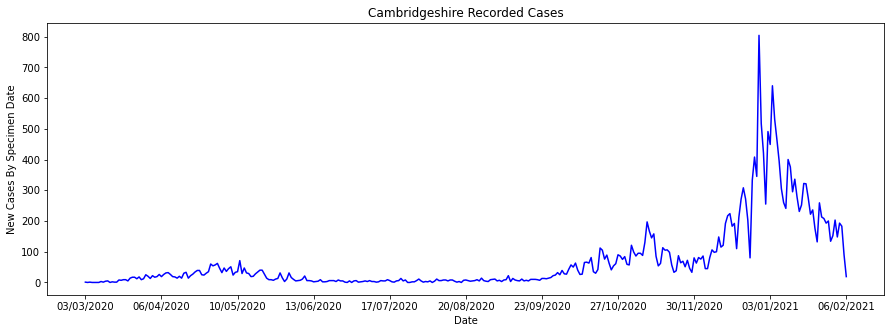

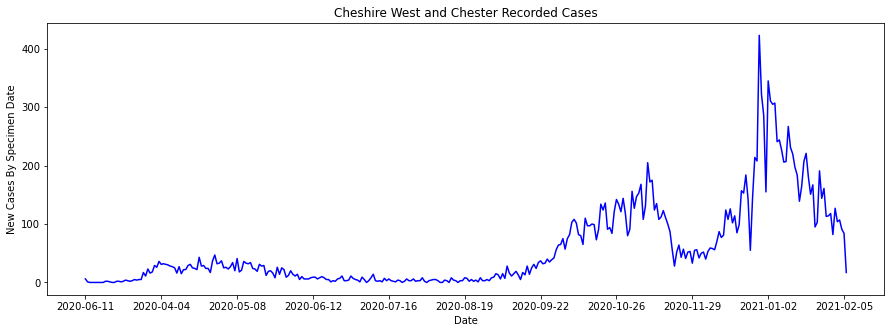

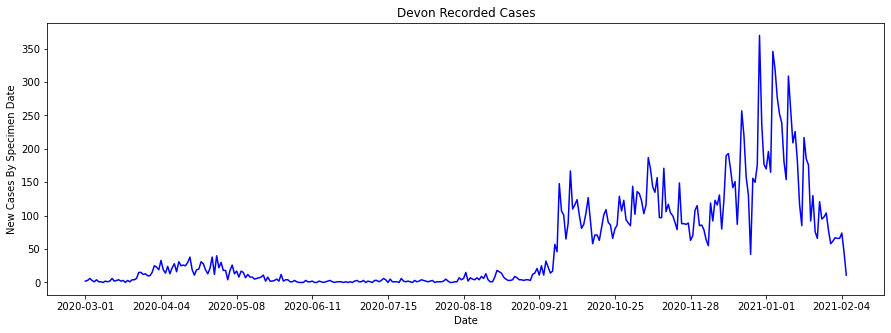

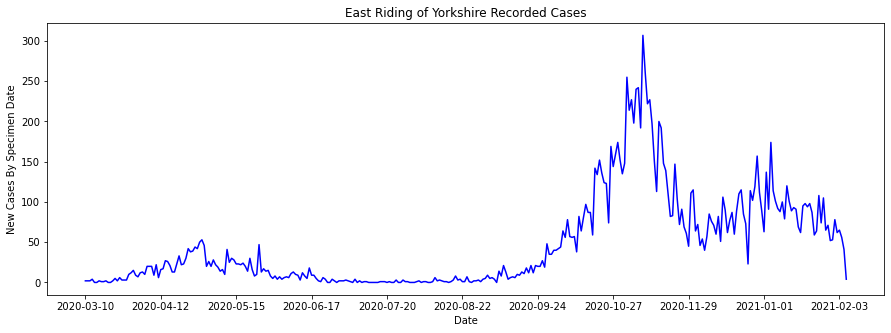

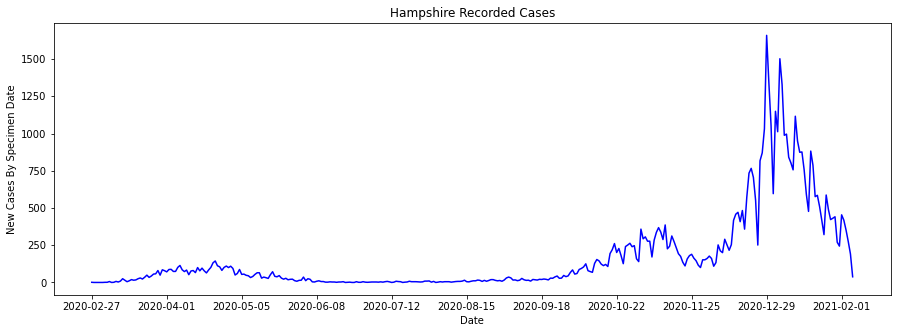

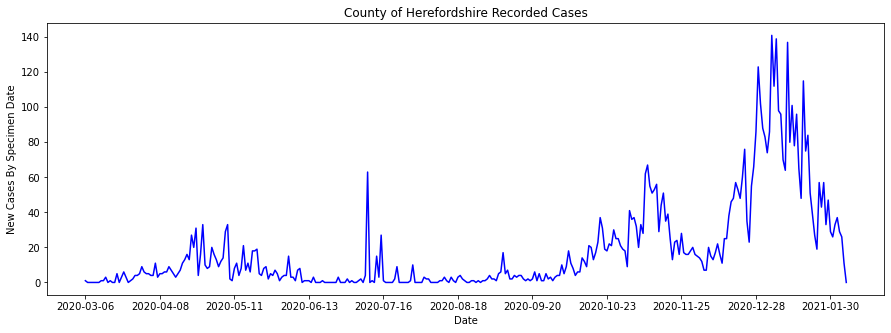

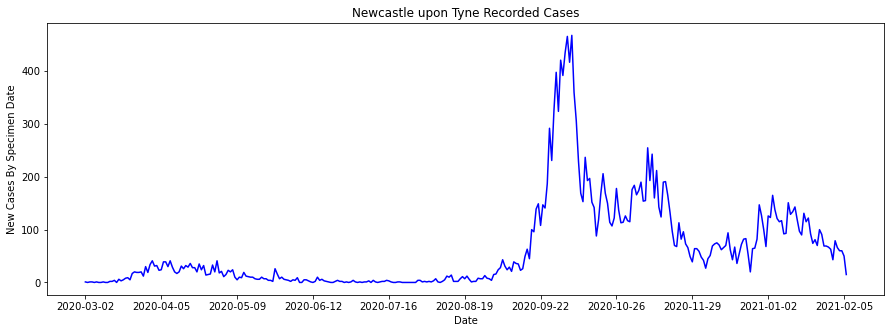

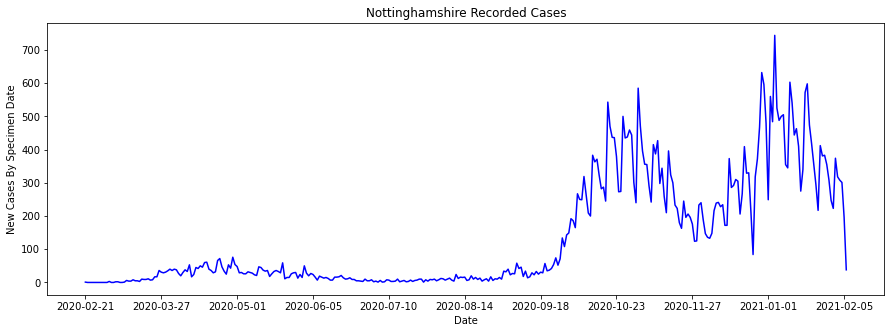

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


factual_location_list = ['Cambridgeshire', 'Cheshire_West_and_Chester', 'Devon', 
                         'East_Riding_of_Yorkshire', 'Hampshire', 'County_of_Herefordshire',
                         'Newcastle_upon_Tyne', 'Nottinghamshire']

for location in factual_location_list: #Ploting all factual data on graphs
    factual_data = pd.read_csv(location + '_2021-02-07.csv')
    
    plt.figure(figsize=(15, 5))
    plt.xticks(np.arange(0, factual_data['date'].size, step=math.trunc(factual_data['date'].size/10)))
    plt.title(location.replace('_', ' ') + ' Recorded Cases')
    plt.plot(factual_data['date'].loc[::-1], factual_data['newCasesBySpecimenDate'].loc[::-1], "b-")
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('New Cases By Specimen Date', fontsize=10)
    plt.show()
    

In [2]:
social_media_location_list = ['Cambridgeshire', 'Newcastle_upon_Tyne']

def import_tweets(loc_list):
    table_collection = {}
    
    for location in loc_list:
        table_collection[location] = pd.read_table("Tweets - " + location + ".tsv")

    return table_collection


#Function to analyse the tweets using words collected before studying the social media data
def pre_pull_analyse_tweets(tweets):
    level_1_conditions = ['#covid', '#covid-19', '#coronavirus', '#covid19']
    level_2_conditions = ['covid', 'covid-19', 'coronavirus', 'covid19']
    level_3_conditions = ['lockdown', 'cough', 'fever', 'temperature', 'distance', 'distancing', 'outbreak', 'pandemic',
                          'epidemic', 'spread', 'quarantine', 'self-quarantine', 'self quarantine', 'isolate', 'isolation', 
                          'self isolate', 'self isolation', 'contagious', 'infectious', 'virus', 'pneumonia', 'herd immunity',
                          'immunity', 'immunocompromised', 'ppe', 'personal protective equipment']
    level_1_weights = 0
    level_2_weights = 0
    level_3_weights = 0
    
    #Casefold converts every letter to its lower case form
    for tweet in tweets: 
        # Based the following if statements on code from https://stackoverflow.com/questions/6531482/how-to-check-if-a-string-contains-an-element-from-a-list-in-python
        if any(condition in tweet.casefold() for condition in level_1_conditions):       
            level_1_weights += 1
            
        elif any(condition in tweet.casefold() for condition in level_2_conditions):
            level_2_weights += 1
            
        elif any(condition in tweet.casefold() for condition in level_3_conditions):
            level_3_weights += 1
            
    return [level_1_weights, level_2_weights, level_3_weights]


#Function to analyse the tweets using words collected before and after studying the social media data
def post_pull_analyse_tweets(tweets):
    level_1_conditions = ['#covid', '#covid-19', '#coronavirus', '#covid19']
    level_2_conditions = ['covid', 'covid-19', 'coronavirus', 'covid19']
    level_3_conditions = ['lockdown', 'cough', 'fever', 'temperature', 'distance', 'distancing', 'outbreak', 'pandemic',
                          'epidemic', 'spread', 'quarantine', 'self-quarantine', 'self quarantine', 'isolate', 'isolation', 
                          'self isolate', 'self isolation', 'contagious', 'infectious', 'virus', 'pneumonia', 'herd immunity',
                          'immunity', 'immunocompromised', 'ppe', 'personal protective equipment', 'vaccine', 'restrict', 
                          'restriction', 'hospital', 'patient', 'tier', 'guidelines', 'mask', 'bubble']
    level_1_weights = 0
    level_2_weights = 0
    level_3_weights = 0
    
    #Casefold converts every letter to its lower case form
    for tweet in tweets: 
        if any(condition in tweet.casefold() for condition in level_1_conditions):       
            level_1_weights += 1
            
        elif any(condition in tweet.casefold() for condition in level_2_conditions):
            level_2_weights += 1
            
        elif any(condition in tweet.casefold() for condition in level_3_conditions):
            level_3_weights += 1
            
    return [level_1_weights, level_2_weights, level_3_weights]


#Function to analyse the tweets using words collected before and after studying the social media data
#and instead of using else ifs, have each condition a separate if
def post_ifs_analyse_tweets(tweets):
    level_1_conditions = ['#covid', '#covid-19', '#coronavirus', '#covid19']
    level_2_conditions = ['covid', 'covid-19', 'coronavirus', 'covid19']
    level_3_conditions = ['lockdown', 'cough', 'fever', 'temperature', 'distance', 'distancing', 'outbreak', 'pandemic',
                          'epidemic', 'spread', 'quarantine', 'self-quarantine', 'self quarantine', 'isolate', 'isolation', 
                          'self isolate', 'self isolation', 'contagious', 'infectious', 'virus', 'pneumonia', 'herd immunity',
                          'immunity', 'immunocompromised', 'ppe', 'personal protective equipment', 'vaccine', 'restrict', 
                          'restriction', 'hospital', 'patient', 'tier', 'guidelines', 'mask', 'bubble']
    level_1_weights = 0
    level_2_weights = 0
    level_3_weights = 0
    
    #Casefold converts every letter to its lower case form
    for tweet in tweets:
        if any(condition in tweet.casefold() for condition in level_1_conditions):      
            level_1_weights += 1
            
        if any(condition in tweet.casefold() for condition in level_2_conditions):
            level_2_weights += 1

        if any(condition in tweet.casefold() for condition in level_3_conditions):
            level_3_weights += 1
            
    return [level_1_weights, level_2_weights, level_3_weights]


def date_split(single_loc_data):
    single_location_collection = {}
    dates = single_loc_data['Date'].unique().tolist()
        
    for date in dates:
        single_location_collection[date] = single_loc_data.loc[single_loc_data['Date'] == date].iloc[:, 1]
        
    return single_location_collection


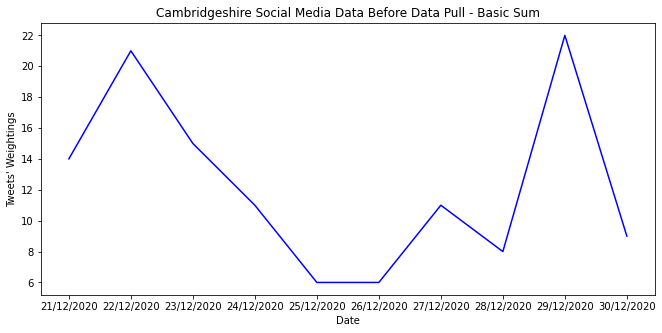

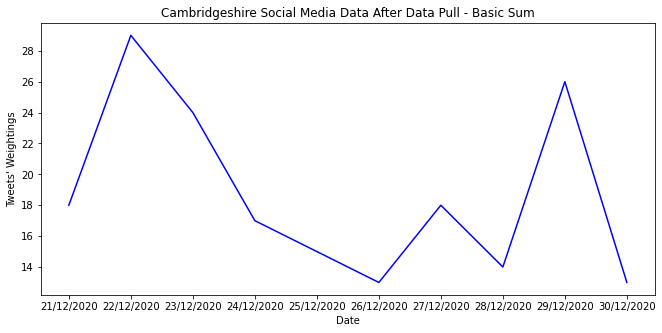

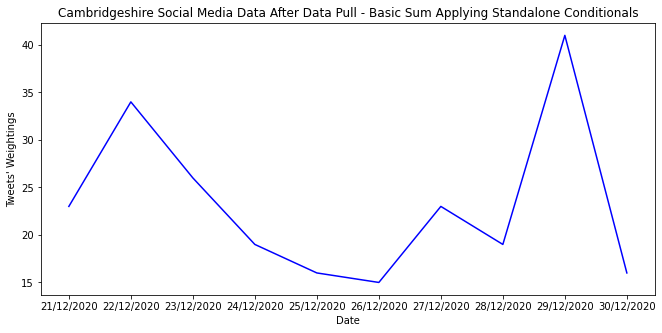

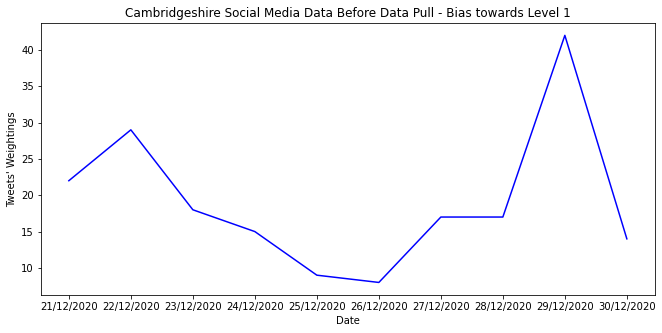

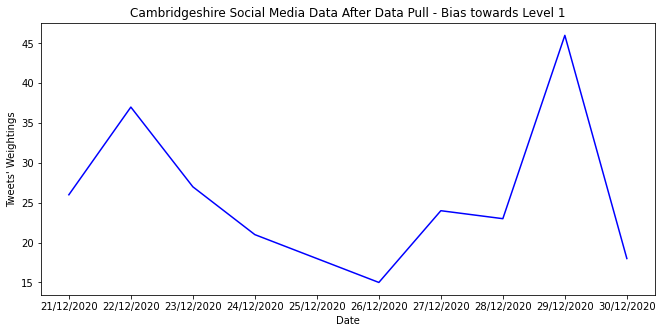

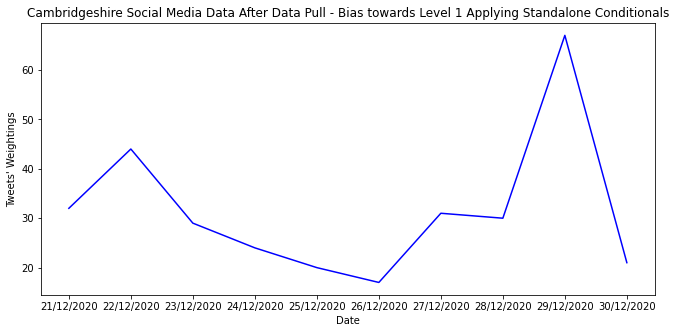

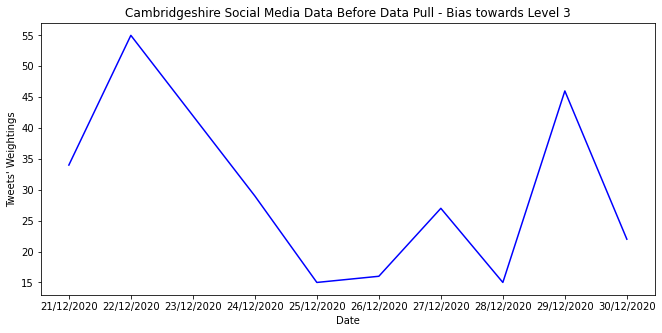

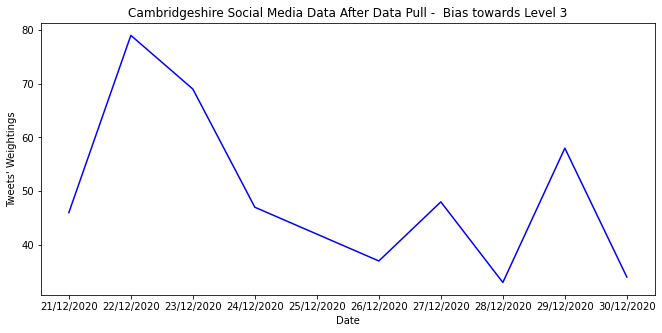

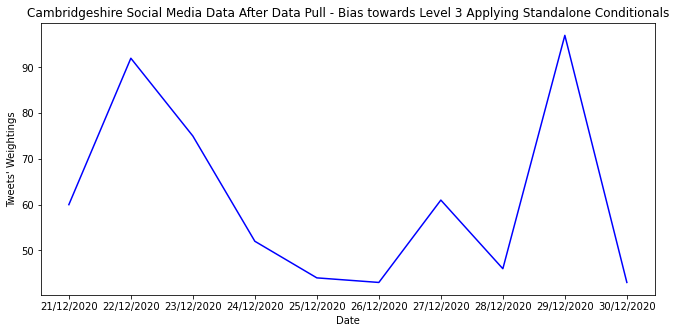

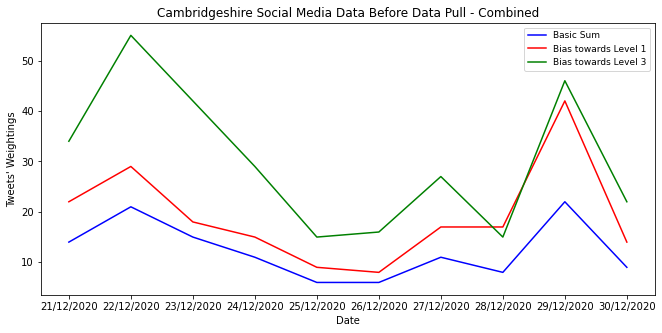

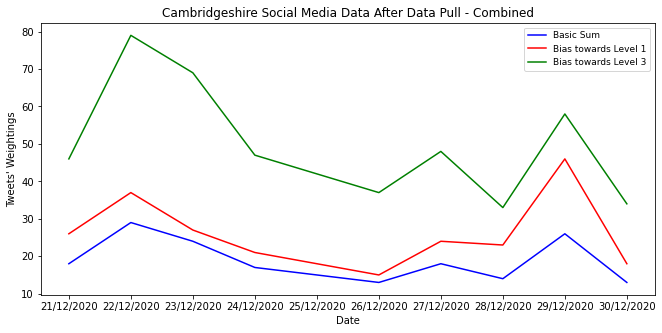

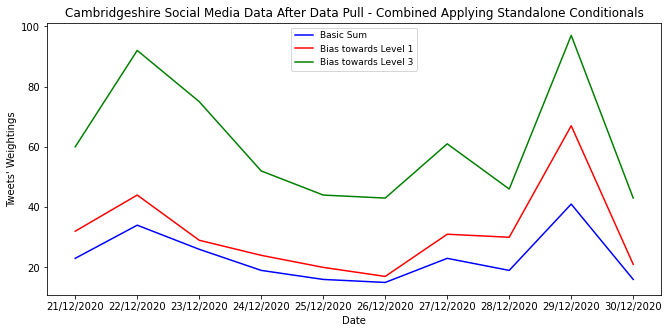

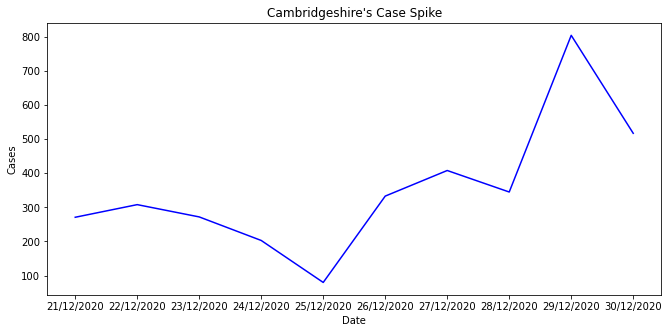

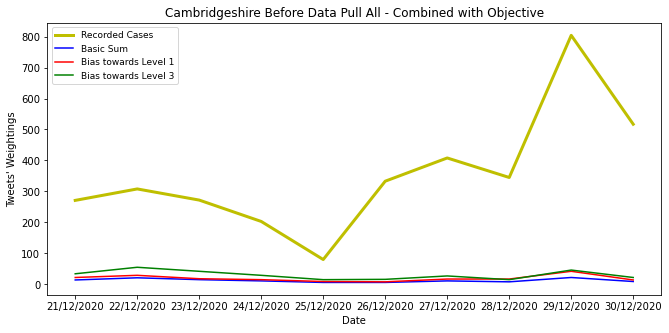

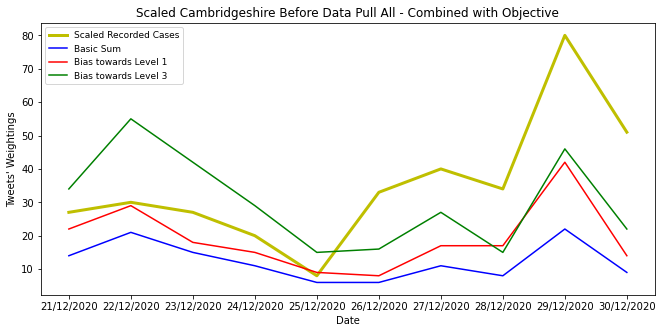

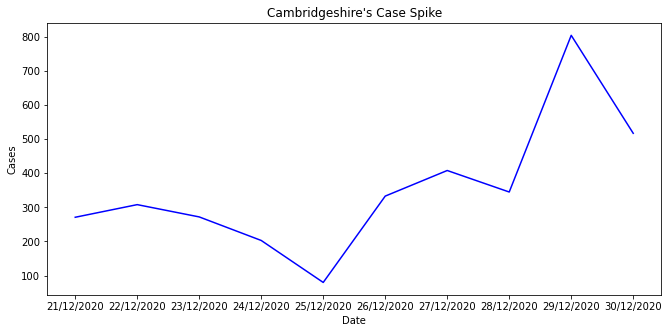

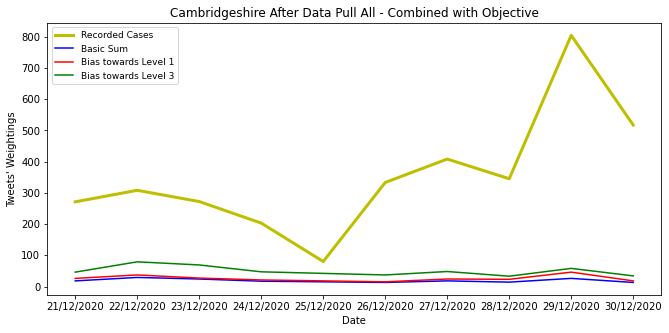

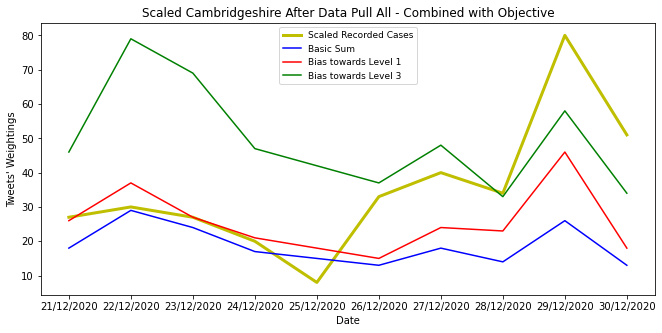

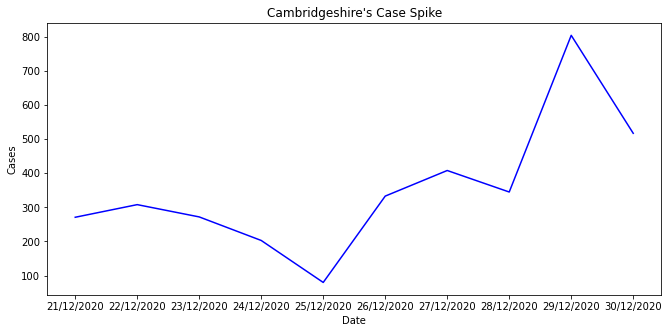

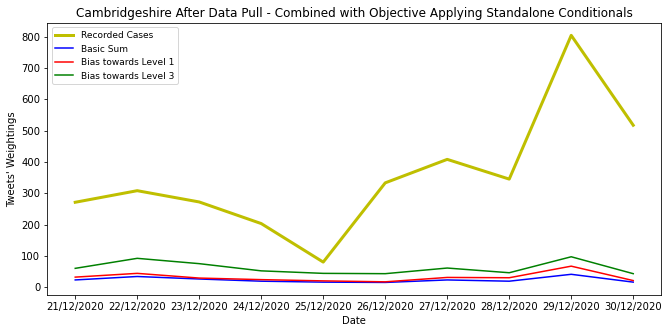

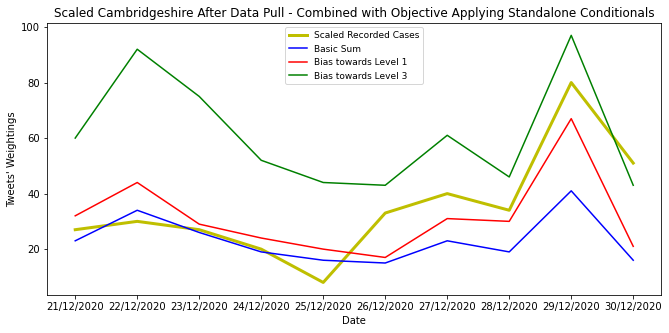

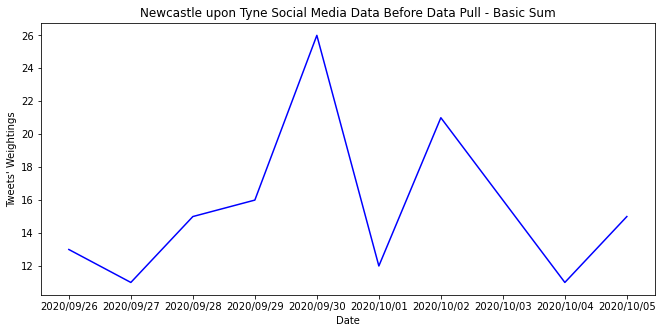

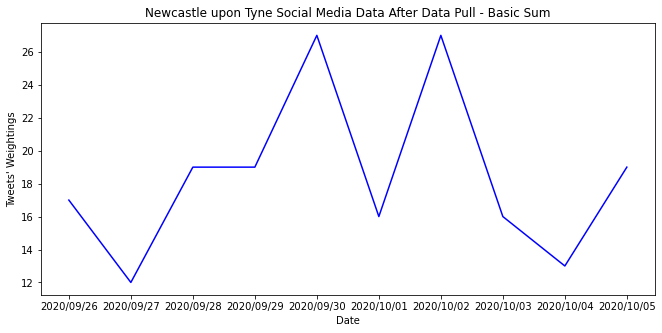

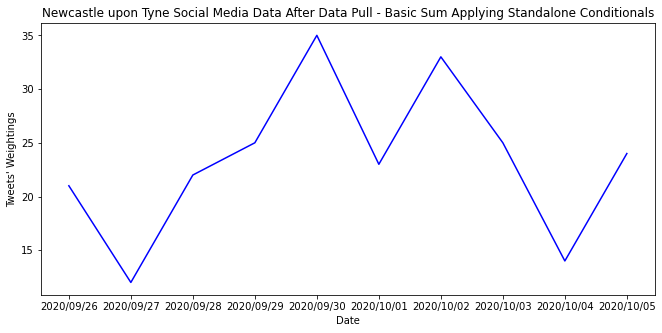

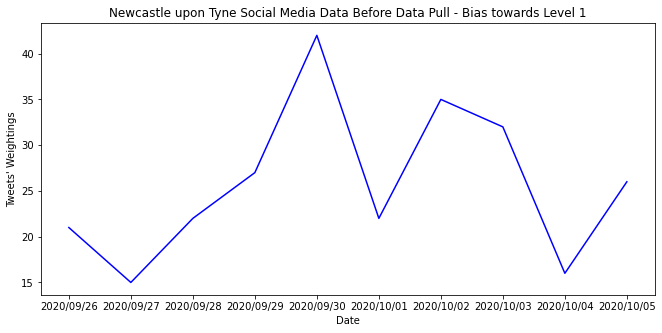

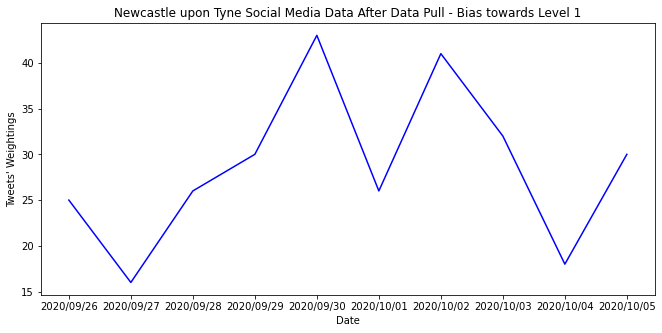

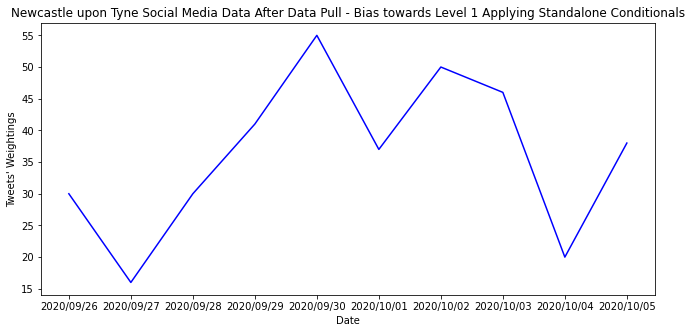

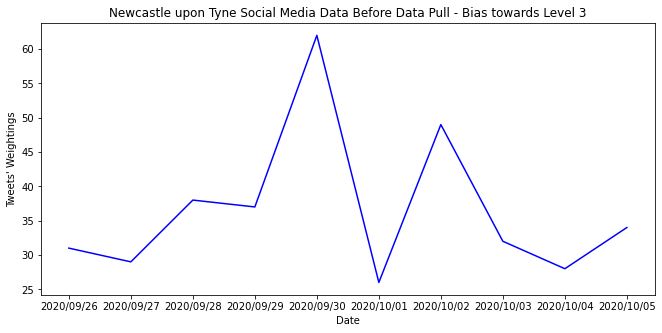

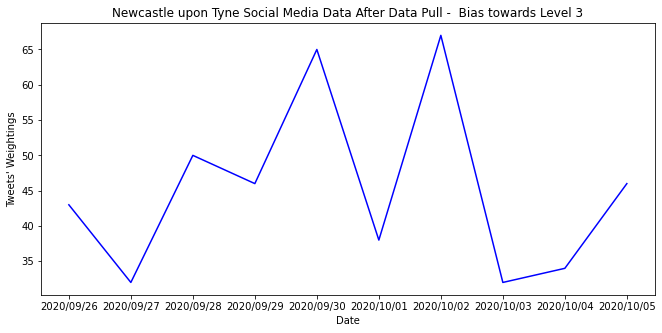

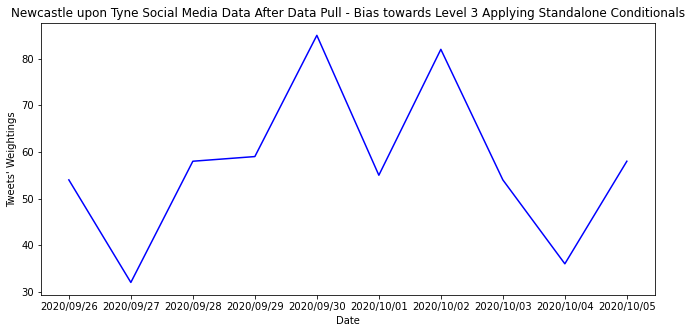

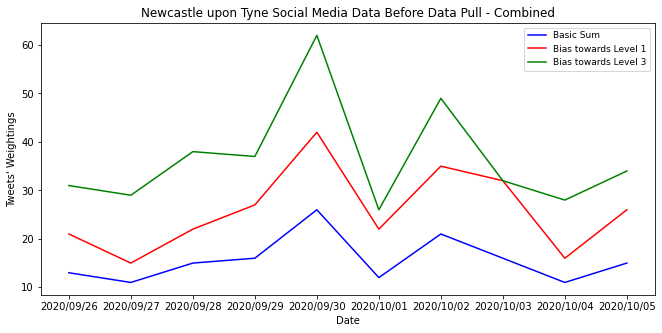

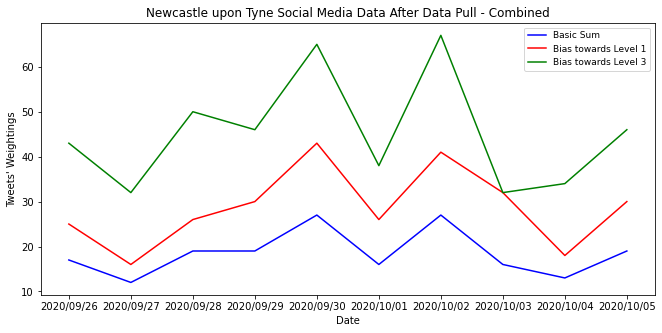

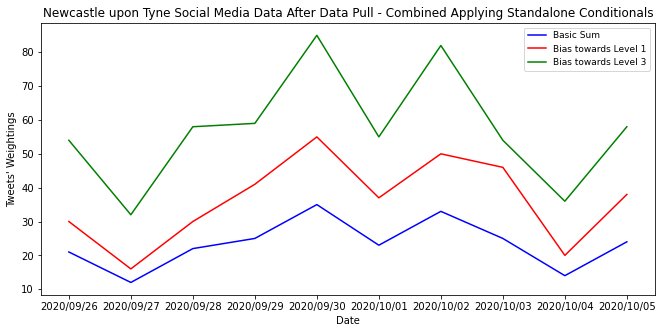

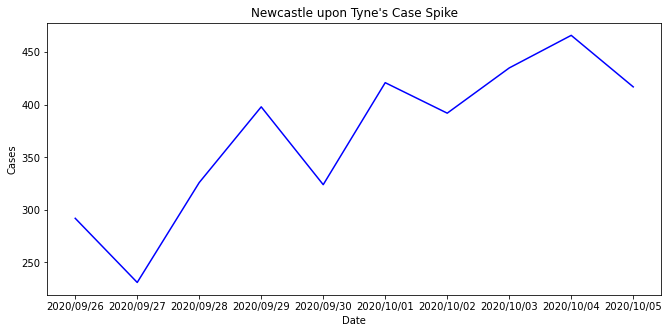

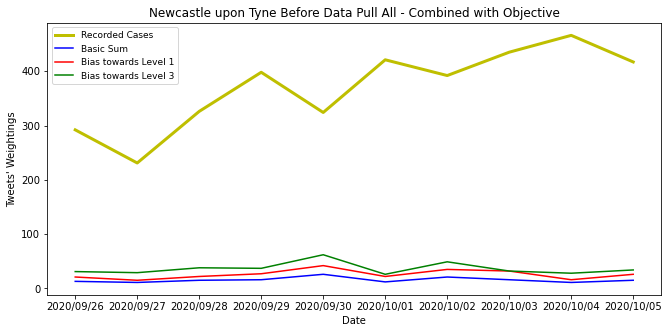

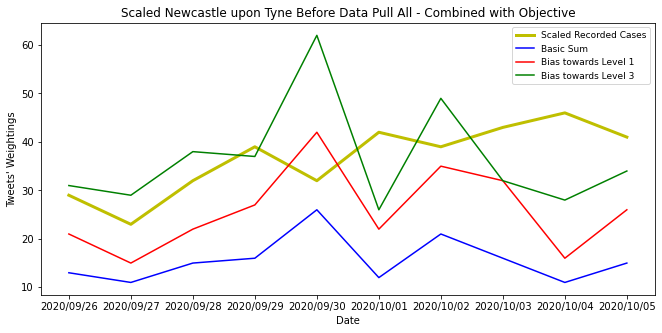

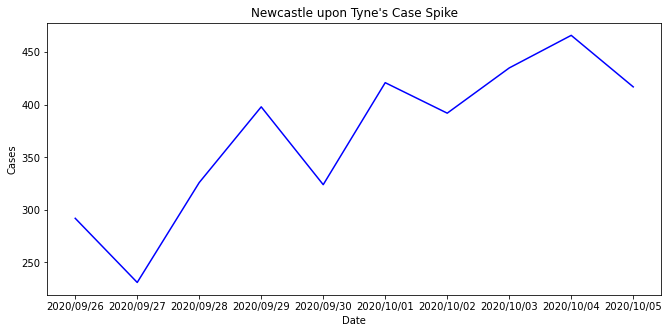

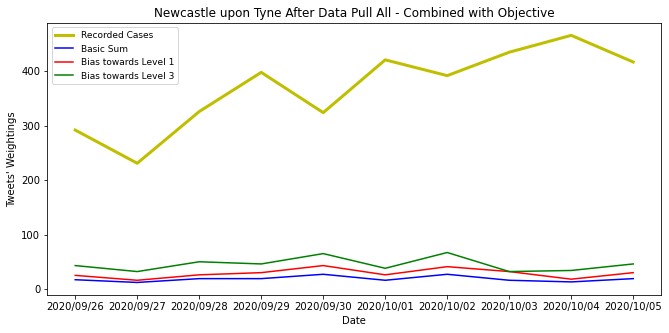

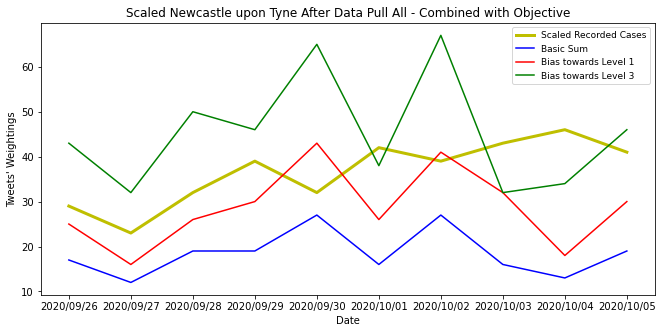

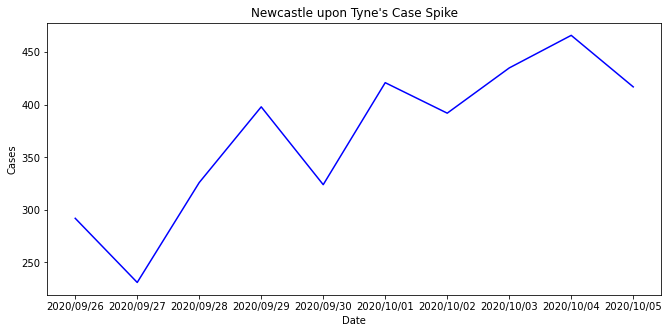

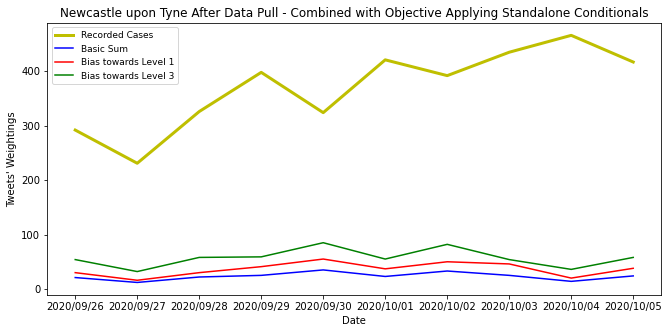

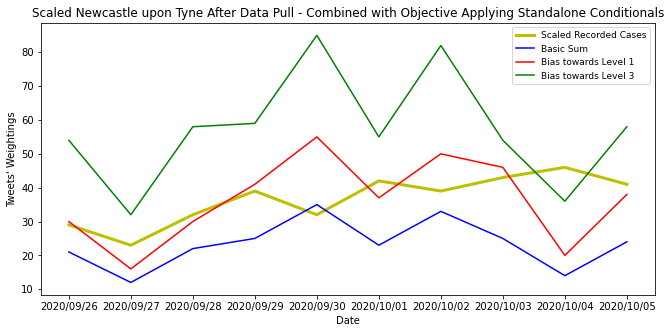

In [3]:
def plot_graph(location, dates, weights, method):
    plt.figure(figsize=(11, 5))
    plt.title(location.replace('_', ' ') + ' Social Media Data ' + method)
    plt.plot(dates, weights , "b-")
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Tweets\' Weightings', fontsize=10)
    plt.show()
    
    
def plot_multiple_graph(location, dates, weight_1, weight_2, weight_3, method):
    plt.figure(figsize=(11, 5))
    plt.title(location.replace('_', ' ') + ' Social Media Data ' + method)
    plt.plot(dates, weight_1, "b-", label='Basic Sum')
    plt.plot(dates, weight_2, "r-", label='Bias towards Level 1')
    plt.plot(dates, weight_3, "g-", label='Bias towards Level 3')
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Tweets\' Weightings', fontsize=10)
    plt.legend(loc='best', fontsize=9)
    plt.show()
    
    
def plot_on_factual_data(location, dates, weight_1, weight_2, weight_3, method):
    single_factual_data = pd.read_csv(location + '_2021-02-07.csv')
    single_factual_data['date'] = single_factual_data['date'].str.replace('-', '/')

    factual_numbers = {}
    
    for date in dates: # little problem here when coding this bit
        factual_numbers[date] = single_factual_data.loc[single_factual_data['date'] == date, ['newCasesBySpecimenDate']].iloc[0].item()
        
    plt.figure(figsize=(11, 5))
    plt.title(location.replace('_', ' ') + '\'s Case Spike')
    plt.plot(dates, list(factual_numbers.values()), "b-")
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Cases', fontsize=10)
    plt.show()
    
    plt.figure(figsize=(11, 5))
    plt.title(location.replace('_', ' ') + ' ' + method)
    plt.plot(dates, list(factual_numbers.values()), "y-", linewidth=3, label='Recorded Cases')
    plt.plot(dates, weight_1, "b-", label='Basic Sum')
    plt.plot(dates, weight_2, "r-", label='Bias towards Level 1')
    plt.plot(dates, weight_3, "g-", label='Bias towards Level 3')
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Tweets\' Weightings', fontsize=10)
    plt.legend(loc='best', fontsize=9)
    plt.show()
    
    #print(list(factual_numbers.values()))
    
    highest_value = max(list(factual_numbers.values()))
    normalised_factual_values = []
    
    for factual_num in list(factual_numbers.values()):
        normalised_factual_values.append(math.trunc(factual_num/10))
    
    plt.figure(figsize=(11, 5))
    plt.title('Scaled ' + location.replace('_', ' ') + ' ' + method)
    plt.plot(dates, normalised_factual_values, "y-", linewidth=3, label='Scaled Recorded Cases')
    plt.plot(dates, weight_1, "b-", label='Basic Sum')
    plt.plot(dates, weight_2, "r-", label='Bias towards Level 1')
    plt.plot(dates, weight_3, "g-", label='Bias towards Level 3')
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Tweets\' Weightings', fontsize=10)
    plt.legend(loc='best', fontsize=9)
    plt.show()
    
    
#Function using the summation of the three different levels of covid tweets to create different weightings
def different_weightings(weights):
    basic_sum = []
    high_level_1_sum = []
    high_level_3_sum = []
    
    #Level 1 weighting = 1 | Level 2 weighting = 1 | Level 3 weighting = 1
    for weight in weights:
        #print(weight)
        basic_sum.append(sum(weight))
    
    #Level 1 weighting = 3 | Level 2 weighting = 2 | Level 3 weighting = 1
    for weight in weights:
        #print(weight)
        high_level_1_sum.append((weight[0] * 3) + (weight[1] * 2) + (weight[2] * 1))
    
    #Level 1 weighting = 1 | Level 2 weighting = 2 | Level 3 weighting = 3
    for weight in weights:
        #print(weight)
        high_level_3_sum.append((weight[0] * 1) + (weight[1] * 2) + (weight[2] * 3))
    
    return basic_sum, high_level_1_sum, high_level_3_sum
    

# Analysing all social media data
all_social_media_data = import_tweets(social_media_location_list)

pre_pull_all_weights = {}
post_pull_all_weights = {}
post_ifs_all_weights = {}

for location in social_media_location_list:
    all_social_media_data[location] = date_split(all_social_media_data[location])
    dates = all_social_media_data[location].keys()
    
    pre_single_loc_weights = {}
    post_single_loc_weights = {}
    post_ifs_single_loc_weights = {}
    
    for date in dates:
        pre_single_loc_weights[date] = pre_pull_analyse_tweets(all_social_media_data[location][date])
        post_single_loc_weights[date] = post_pull_analyse_tweets(all_social_media_data[location][date])
        post_ifs_single_loc_weights[date] = post_ifs_analyse_tweets(all_social_media_data[location][date])
    
    pre_pull_all_weights[location] = pre_single_loc_weights
    post_pull_all_weights[location] = post_single_loc_weights
    post_ifs_all_weights[location] = post_ifs_single_loc_weights
    
    pre_basic_sum, pre_1_sum, pre_3_sum = different_weightings(pre_single_loc_weights.values())
    post_basic_sum, post_1_sum, post_3_sum = different_weightings(post_single_loc_weights.values())
    post_ifs_basic_sum, post_ifs_1_sum, post_ifs_3_sum = different_weightings(post_ifs_single_loc_weights.values())
    
    plot_graph(location, dates, pre_basic_sum, 'Before Data Pull - Basic Sum')
    plot_graph(location, dates, post_basic_sum, 'After Data Pull - Basic Sum')
    plot_graph(location, dates, post_ifs_basic_sum, 'After Data Pull - Basic Sum Applying Standalone Conditionals')
    
    plot_graph(location, dates, pre_1_sum, 'Before Data Pull - Bias towards Level 1')
    plot_graph(location, dates, post_1_sum, 'After Data Pull - Bias towards Level 1')
    plot_graph(location, dates, post_ifs_1_sum, 'After Data Pull - Bias towards Level 1 Applying Standalone Conditionals')
    
    plot_graph(location, dates, pre_3_sum, 'Before Data Pull - Bias towards Level 3')
    plot_graph(location, dates, post_3_sum, 'After Data Pull -  Bias towards Level 3')
    plot_graph(location, dates, post_ifs_3_sum, 'After Data Pull - Bias towards Level 3 Applying Standalone Conditionals')
    
    plot_multiple_graph(location, dates, pre_basic_sum, pre_1_sum, pre_3_sum, 'Before Data Pull - Combined')
    plot_multiple_graph(location, dates, post_basic_sum, post_1_sum, post_3_sum, 'After Data Pull - Combined')
    plot_multiple_graph(location, dates, post_ifs_basic_sum, post_ifs_1_sum, post_ifs_3_sum, 'After Data Pull - Combined Applying Standalone Conditionals')
    
    plot_on_factual_data(location, dates, pre_basic_sum, pre_1_sum, pre_3_sum, 'Before Data Pull All - Combined with Objective')
    plot_on_factual_data(location, dates, post_basic_sum, post_1_sum, post_3_sum, 'After Data Pull All - Combined with Objective')
    plot_on_factual_data(location, dates, post_ifs_basic_sum, post_ifs_1_sum, post_ifs_3_sum, 'After Data Pull - Combined with Objective Applying Standalone Conditionals')
    


In [4]:
from scipy.stats import pearsonr

def correlation_coefficient():
    for location in social_media_location_list: 
        print(location + "'s Pearson's Coefficient and p-value")
        single_factual_data = pd.read_csv(location + '_2021-02-07.csv')
        single_factual_data['date'] = single_factual_data['date'].str.replace('-', '/')

        factual_numbers = {}
        
        dates = pre_pull_all_weights[location].keys()
    
        for date in dates:
            factual_numbers[date] = single_factual_data.loc[single_factual_data['date'] == date, ['newCasesBySpecimenDate']].iloc[0].item()

        pre_basic_sum, pre_1_sum, pre_3_sum = different_weightings(pre_pull_all_weights[location].values())
        post_basic_sum, post_1_sum, post_3_sum = different_weightings(post_pull_all_weights[location].values())
        post_ifs_basic_sum, post_ifs_1_sum, post_ifs_3_sum = different_weightings(post_ifs_all_weights[location].values())
    
        highest_value = max(list(factual_numbers.values()))
        normalised_factual_values = []
    
        for factual_num in list(factual_numbers.values()):
            normalised_factual_values.append(math.trunc(factual_num/10))
        
        print("Basic Sum:")
        print("Before Data Pull - " + str(list(pearsonr(pre_basic_sum, normalised_factual_values))))
        print("After Data Pull - " + str(list(pearsonr(post_basic_sum, normalised_factual_values))))
        print("After Data Pull - Applying All if Statements - " + str(list(pearsonr(post_ifs_basic_sum, normalised_factual_values))))
        
        print("Bias Towards Level 1:")
        print("Before Data Pull - " + str(list(pearsonr(pre_1_sum, normalised_factual_values))))
        print("After Data Pull - " + str(list(pearsonr(post_1_sum, normalised_factual_values))))
        print("After Data Pull - Applying All if Statements - " + str(list(pearsonr(post_ifs_1_sum, normalised_factual_values))))
        
        print("Bias Towards Level 3:")
        print("Before Data Pull - " + str(list(pearsonr(pre_3_sum, normalised_factual_values))))
        print("After Data Pull - " + str(list(pearsonr(post_3_sum, normalised_factual_values))))
        print("After Data Pull - Applying All if Statements - " + str(list(pearsonr(post_ifs_3_sum, normalised_factual_values))) + "\n")
        

correlation_coefficient()

Cambridgeshire's Pearson's Coefficient and p-value
Basic Sum:
Before Data Pull - [0.505405042284098, 0.13617908439561893]
After Data Pull - [0.2872301923475962, 0.4210052157922904]
After Data Pull - Applying All if Statements - [0.5968614319915978, 0.06850370197484024]
Bias Towards Level 1:
Before Data Pull - [0.6995503781537863, 0.024337054042191514]
After Data Pull - [0.6113329822381744, 0.06039470101198739]
After Data Pull - Applying All if Statements - [0.7132289043718553, 0.020572989448451144]
Bias Towards Level 3:
Before Data Pull - [0.32079039509859425, 0.36613403586747595]
After Data Pull - [0.050024164575319365, 0.8908455632298183]
After Data Pull - Applying All if Statements - [0.4833539520992271, 0.1569882846005793]

Newcastle_upon_Tyne's Pearson's Coefficient and p-value
Basic Sum:
Before Data Pull - [-0.037621559184724956, 0.9178192222934565]
After Data Pull - [0.0030110376170406575, 0.99341341492921]
After Data Pull - Applying All if Statements - [0.16211647455500647, 0.6